In [46]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6741882f-7905-4683-afcc-5c54911a8ce5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-07-02T12:40:49.315Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 10049}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11491, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [48]:
type(data)

dict

In [50]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [52]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971926e+07,1.971926e+07,False,NaN,1,NaN,NaN,None,2024-07-02T12:39:00.000Z,62743.672067,2.197302e+10,-0.2736,-0.005812,-0.011754,2.565550,-7.809563,4.120605,-4.698530,1.237259e+12,53.4135,1.317617e+12,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201914e+08,1.201914e+08,True,NaN,2,NaN,NaN,None,2024-07-02T12:39:00.000Z,3447.445201,1.014897e+10,-7.3535,-0.015768,-0.548710,2.255266,-9.133981,13.873632,4.257247,4.143533e+11,17.8880,4.143533e+11,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
2,825,Tether USDt,USDT,tether,90736,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.127873e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-02T12:39:00.000Z,0.998527,4.059156e+10,-3.9216,-0.001550,-0.018365,-0.086266,-0.103166,-0.152998,-0.181411,1.126212e+11,4.8620,1.159059e+11,None,2024-07-02T12:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-02 07:40:56.606419
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475831e+08,1.475831e+08,False,NaN,4,NaN,NaN,None,2024-07-02T12:39:00.000Z,579.636953,1.518464e+09,-7.9561,0.181428,0.064840,1.322154,-3.699253,1.943112,4.533060,8.554462e+10,3.6930,8.554462e+10,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
4,5426,Solana,SOL,solana,696,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.627805e+08,5.793834e+08,True,NaN,5,NaN,NaN,None,2024-07-02T12:39:00.000Z,150.549669,1.722501e+09,0.5996,0.580984,2.557515,9.532978,-9.050936,7.261775,-19.683161,6.967145e+10,3.0078,8.722598e+10,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
5,3408,USDC,USDC,usd-coin,20669,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.248159e+10,3.248159e+10,False,NaN,6,NaN,NaN,None,2024-07-02T12:39:00.000Z,0.999893,4.259703e+09,0.0859,-0.001586,-0.001495,-0.001466,-0.016962,-0.035457,0.005404,3.247810e+10,1.4021,3.247810e+10,None,2024-07-02T12:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-02 07:40:56.606419
6,52,XRP,XRP,xrp,1346,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-07-02T12:40:00.000Z,0.486981,8.243528e+08,13.7975,0.375241,1.296247,2.088036,-5.881842,-6.631818,-16.176707,2.711918e+10,1.1708,4.869814e+10,None,2024-07-02T12:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
7,11419,Toncoin,TON,toncoin,449,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.460072e+09,5.108419e+09,True,NaN,8,3.414167e+09,2.744889e+10,None,2024-07-02T12:39:00.000Z,8.039705,2.551940e+08,46.3412,0.234430,5.784274,5.864637,24.876534,49.764595,59.168261,1.977826e+10,0.8538,4.107018e+10,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
8,74,Dogecoin,DOGE,dogecoin,1017,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,

In [71]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6741882f-7905-4683-afcc-5c54911a8ce5',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
        
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile (r'/Users/admin/Desktop/API.csv'):
        df.to_csv(r'/Users/admin/Desktop/API.csv',header='Column_names')
    else:
        df.to_csv(r'/Users/admin/Desktop/API.csv',mode = 'a',header = False)
    

In [56]:
import os
from time import time 
from time import sleep 

for i in range(333):
    api_runner 
    print('api_runner success')
    sleep(60) #sleep for one minute 
exit()

api_runner success
api_runner success
api_runner success


KeyboardInterrupt: 

In [75]:
df20 = pd.read_csv(r'/Users/admin/Desktop/API/API.csv')
df20

FileNotFoundError: [Errno 2] No such file or directory: '/Users/admin/Desktop/API/API.csv'

In [77]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971926e+07,1.971926e+07,False,NaN,1,NaN,NaN,None,2024-07-02T12:39:00.000Z,62743.672067,2.197302e+10,-0.2736,-0.005812,-0.011754,2.565550,-7.809563,4.120605,-4.698530,1.237259e+12,53.4135,1.317617e+12,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201914e+08,1.201914e+08,True,NaN,2,NaN,NaN,None,2024-07-02T12:39:00.000Z,3447.445201,1.014897e+10,-7.3535,-0.015768,-0.548710,2.255266,-9.133981,13.873632,4.257247,4.143533e+11,17.8880,4.143533e+11,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
2,825,Tether USDt,USDT,tether,90736,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.127873e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-02T12:39:00.000Z,0.998527,4.059156e+10,-3.9216,-0.001550,-0.018365,-0.086266,-0.103166,-0.152998,-0.181411,1.126212e+11,4.8620,1.159059e+11,None,2024-07-02T12:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-02 07:40:56.606419
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475831e+08,1.475831e+08,False,NaN,4,NaN,NaN,None,2024-07-02T12:39:00.000Z,579.636953,1.518464e+09,-7.9561,0.181428,0.064840,1.322154,-3.699253,1.943112,4.533060,8.554462e+10,3.6930,8.554462e+10,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
4,5426,Solana,SOL,solana,696,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.627805e+08,5.793834e+08,True,NaN,5,NaN,NaN,None,2024-07-02T12:39:00.000Z,150.549669,1.722501e+09,0.5996,0.580984,2.557515,9.532978,-9.050936,7.261775,-19.683161,6.967145e+10,3.0078,8.722598e+10,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
5,3408,USDC,USDC,usd-coin,20669,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.248159e+10,3.248159e+10,False,NaN,6,NaN,NaN,None,2024-07-02T12:39:00.000Z,0.999893,4.259703e+09,0.0859,-0.001586,-0.001495,-0.001466,-0.016962,-0.035457,0.005404,3.247810e+10,1.4021,3.247810e+10,None,2024-07-02T12:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-02 07:40:56.606419
6,52,XRP,XRP,xrp,1346,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-07-02T12:40:00.000Z,0.486981,8.243528e+08,13.7975,0.375241,1.296247,2.088036,-5.881842,-6.631818,-16.176707,2.711918e+10,1.1708,4.869814e+10,None,2024-07-02T12:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
7,11419,Toncoin,TON,toncoin,449,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.460072e+09,5.108419e+09,True,NaN,8,3.414167e+09,2.744889e+10,None,2024-07-02T12:39:00.000Z,8.039705,2.551940e+08,46.3412,0.234430,5.784274,5.864637,24.876534,49.764595,59.168261,1.977826e+10,0.8538,4.107018e+10,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
8,74,Dogecoin,DOGE,dogecoin,1017,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,

In [83]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [85]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19719265.00000,19719265.00000,False,NaN,1,NaN,NaN,None,2024-07-02T12:39:00.000Z,62743.67207,21973019205.05447,-0.27360,-0.00581,-0.01175,2.56555,-7.80956,4.12061,-4.69853,1237259096568.49902,53.41350,1317617113413.62988,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120191423.45771,120191423.45771,True,NaN,2,NaN,NaN,None,2024-07-02T12:39:00.000Z,3447.44520,10148971326.88110,-7.35350,-0.01577,-0.54871,2.25527,-9.13398,13.87363,4.25725,414353345942.70898,17.88800,414353345942.71002,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
2,825,Tether USDt,USDT,tether,90736,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112787335849.36160,116076856617.66272,True,NaN,3,NaN,NaN,None,2024-07-02T12:39:00.000Z,0.99853,40591555111.81557,-3.92160,-0.00155,-0.01837,-0.08627,-0.10317,-0.15300,-0.18141,112621208851.72887,4.86200,115905884411.08000,None,2024-07-02T12:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-02 07:40:56.606419
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583094.60080,147583094.60080,False,NaN,4,NaN,NaN,None,2024-07-02T12:39:00.000Z,579.63695,1518463675.04966,-7.95610,0.18143,0.06484,1.32215,-3.69925,1.94311,4.53306,85544615322.75095,3.69300,85544615322.75000,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
4,5426,Solana,SOL,solana,696,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462780469.22079,579383421.76526,True,NaN,5,NaN,NaN,None,2024-07-02T12:39:00.000Z,150.54967,1722500693.63112,0.59960,0.58098,2.55752,9.53298,-9.05094,7.26178,-19.68316,69671446588.97243,3.00780,87225982531.25000,None,2024-07-02T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
5,3408,USDC,USDC,usd-coin,20669,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32481593936.05838,32481593936.05838,False,NaN,6,NaN,NaN,None,2024-07-02T12:39:00.000Z,0.99989,4259702899.27131,0.08590,-0.00159,-0.00149,-0.00147,-0.01696,-0.03546,0.00540,32478103517.57532,1.40210,32478103517.58000,None,2024-07-02T12:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-02 07:40:56.606419
6,52,XRP,XRP,xrp,1346,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55688327582.00000,99987490594.00000,False,NaN,7,NaN,NaN,None,2024-07-02T12:40:00.000Z,0.48698,824352761.95569,13.79750,0.37524,1.29625,2.08804,-5.88184,-6.63182,-16.17671,27119178161.79703,1.17080,48698137184.79000,None,2024-07-02T12:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 07:40:56.606419
7,11419,Toncoin,TON,toncoin,449,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2460072371.62395,5108418720.62011,True,NaN,8,3414166606.00000,27448892843.79960,None,2024-07-02T12:39:00.000Z,8.03971,255194000.54219,46.34120,0.23443,5.78427,5.86464,24.87653,49.76460,59.16826,19778256514.49702,0.85380,41070180294.41000,None,2024-07-02T12:39:0

In [91]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.volume_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.volume_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.00581,21973019205.05447,2.56555,-7.80956,4.12061,-4.69853
Ethereum,-0.01577,10148971326.88110,2.25527,-9.13398,13.87363,4.25725
Tether USDt,-0.00155,40591555111.81557,-0.08627,-0.10317,-0.15300,-0.18141
BNB,0.18143,1518463675.04966,1.32215,-3.69925,1.94311,4.53306
Solana,0.58098,1722500693.63112,9.53298,-9.05094,7.26178,-19.68316
USDC,-0.00159,4259702899.27131,-0.00147,-0.01696,-0.03546,0.00540
XRP,0.37524,824352761.95569,2.08804,-5.88184,-6.63182,-16.17671
Toncoin,0.23443,255194000.54219,5.86464,24.87653,49.76460,59.16826
Dogecoin,0.32744,389667844.06050,0.52275,-21.83805,-8.31204,-31.21486


In [93]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h             -0.00581
           quote.USD.volume_24h           21973019205.05447
           quote.USD.percent_change_7d              2.56555
           quote.USD.percent_change_30d            -7.80956
           quote.USD.percent_change_60d             4.12061
                                                 ...       
Chainlink  quote.USD.volume_24h             272747077.47654
           quote.USD.percent_change_7d              4.76928
           quote.USD.percent_change_30d           -20.53570
           quote.USD.percent_change_60d             5.60025
           quote.USD.percent_change_90d           -18.49220
Length: 90, dtype: float64

In [97]:
type(df4)

pandas.core.series.Series

In [99]:
df5 = df4.to_frame(name='values')
df5

values
name                                                    
Bitcoin   quote.USD.percent_change_1h           -0.00581
          quote.USD.volume_24h         21973019205.05447
          quote.USD.percent_change_7d            2.56555
          quote.USD.percent_change_30d          -7.80956
          quote.USD.percent_change_60d           4.12061
...                                                  ...
Chainlink quote.USD.volume_24h           272747077.47654
          quote.USD.percent_change_7d            4.76928
          quote.USD.percent_change_30d         -20.53570
          quote.USD.percent_change_60d           5.60025
          quote.USD.percent_change_90d         -18.49220

[90 rows x 1 columns]

In [105]:
df5.count()

values    90
dtype: int64

In [111]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00581
1,Bitcoin,quote.USD.volume_24h,21973019205.05447
2,Bitcoin,quote.USD.percent_change_7d,2.56555
3,Bitcoin,quote.USD.percent_change_30d,-7.80956
4,Bitcoin,quote.USD.percent_change_60d,4.12061
...,...,...,...
85,Chainlink,quote.USD.volume_24h,272747077.47654
86,Chainlink,quote.USD.percent_change_7d,4.76928
87,Chainlink,quote.USD.percent_change_30d,-20.53570
88,Chainlink,quote.USD.percent_change_60d,5.60025


In [113]:
df7 = df6.rename(columns ={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00581
1,Bitcoin,quote.USD.volume_24h,21973019205.05447
2,Bitcoin,quote.USD.percent_change_7d,2.56555
3,Bitcoin,quote.USD.percent_change_30d,-7.80956
4,Bitcoin,quote.USD.percent_change_60d,4.12061
...,...,...,...
85,Chainlink,quote.USD.volume_24h,272747077.47654
86,Chainlink,quote.USD.percent_change_7d,4.76928
87,Chainlink,quote.USD.percent_change_30d,-20.53570
88,Chainlink,quote.USD.percent_change_60d,5.60025


In [127]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.volume_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.00581
1,Bitcoin,24h,21973019205.05447
2,Bitcoin,7d,2.56555
3,Bitcoin,30d,-7.80956
4,Bitcoin,60d,4.12061
...,...,...,...
85,Chainlink,24h,272747077.47654
86,Chainlink,7d,4.76928
87,Chainlink,30d,-20.53570
88,Chainlink,60d,5.60025


In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

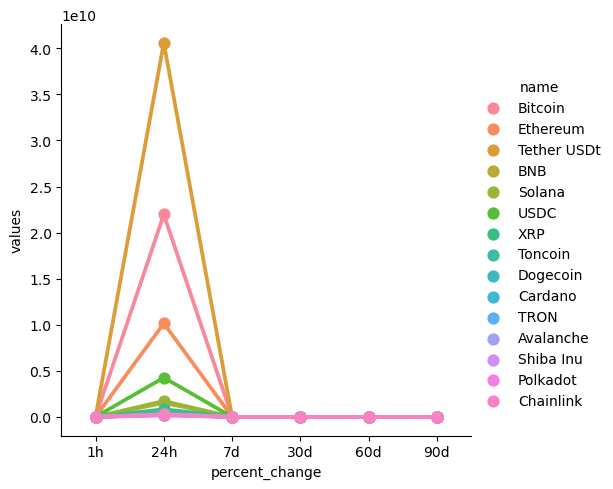

In [131]:
sns.catplot(x='percent_change',y='values',hue = 'name', data = df7, kind = 'point')

In [139]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,62743.67207,2024-07-02 07:40:56.606419


In [211]:
import scipy as scipy

In [252]:
df11 = df[['symbol','date_added']]
df11 = df11.query("symbol == 'BNB'")
df11

,symbol,date_added
3,BNB,2017-07-25T00:00:00.000Z
